<a href="https://colab.research.google.com/github/svnesh/MachineLearning/blob/master/flightticketprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/My Drive/flight_ticket_price_prediction/Input"

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [0]:
df_train = pd.read_excel(os.path.join(root_path, 'Data_Train.xlsx'))
df_test = pd.read_excel(os.path.join(root_path, 'Test_set.xlsx'))

In [0]:
print(f'Training: {df_train.shape}')
print(f'Testing: {df_test.shape}')

Training: (10683, 11)
Testing: (2671, 10)


In [0]:
df_train.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [0]:
df_test.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


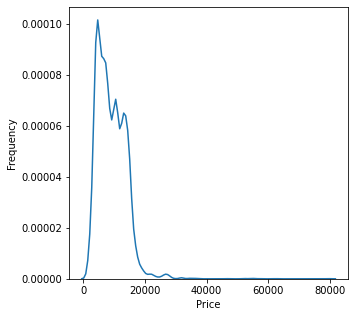

In [0]:
plt.figure(figsize=(5,5))
sns.distplot(df_train['Price'], hist=False, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [0]:
df_train['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [0]:
#df_train.isnull().sum()
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [0]:
df_train.dropna(axis=0, inplace=True)

In [0]:
df_full = df_train.append(df_test, ignore_index=True)
df_full.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13348,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13349,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13350,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13351,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13352,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [0]:
def getValueCounts(df, colname):
  df_CountSer = df[colname].value_counts()
  return pd.DataFrame({colname:df_CountSer.index, 'count':df_CountSer.values})
getValueCounts(df_full, 'Airline')

,Airline,count
0,Jet Airways,4746
1,IndiGo,2564
2,Air India,2191
3,Multiple carriers,1543
4,SpiceJet,1026
5,Vistara,608
6,Air Asia,405
7,GoAir,240
8,Multiple carriers Premium economy,16
9,Jet Airways Business,8


In [0]:
print(getValueCounts(df_full, 'Source'))
print('--------------')
print(getValueCounts(df_full, 'Destination'))

     Source  count
0     Delhi   5681
1   Kolkata   3581
2  Banglore   2752
3    Mumbai    883
4   Chennai    456
--------------
  Destination  count
0      Cochin   5681
1    Banglore   3581
2       Delhi   1582
3   New Delhi   1170
4   Hyderabad    883
5     Kolkata    456


In [0]:
getValueCounts(df_full, 'Total_Stops')

,Total_Stops,count
0,1 stop,7056
1,non-stop,4340
2,2 stops,1899
3,3 stops,56
4,4 stops,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


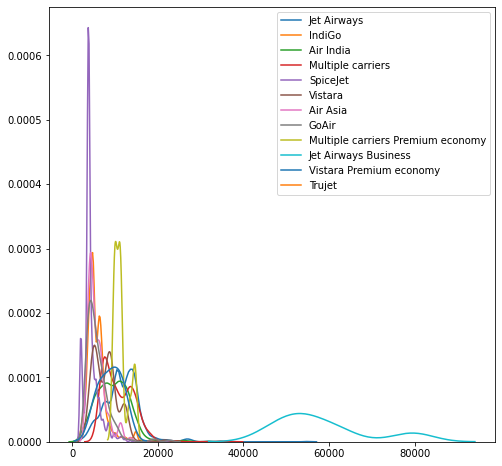

In [0]:
airlines = []
airlines = (df_train['Airline'].value_counts()).index
plt.figure(figsize=(8,8))
for i in airlines:
  df_1 = df_train.loc[df_train['Airline'] == i, 'Price']
  sns.kdeplot(df_1, label=i)
plt.show()

In [0]:
df_full['Destination'].replace(to_replace='New Delhi', value='Delhi', inplace=True)

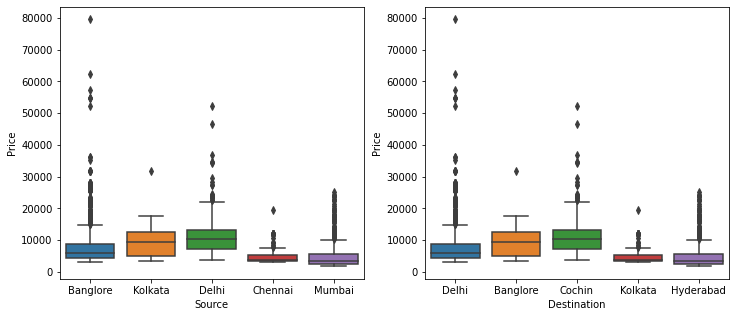

In [0]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(1,2,1)
sns.boxplot(x='Source', y='Price', data=df_full)
fig.add_subplot(1,2,2)
sns.boxplot(x='Destination', y='Price', data=df_full)
plt.show()

In [0]:
print('first date: ', pd.to_datetime(df_full['Date_of_Journey'], errors='raise', format='%d/%m/%Y').min())
print('last date: ' , pd.to_datetime(df_full['Date_of_Journey'], errors='raise', format='%d/%m/%Y').max())

first date:  2019-03-01 00:00:00
last date:  2019-06-27 00:00:00


In [0]:
df_full['doj_date'] = pd.to_datetime(df_full['Date_of_Journey'], errors='raise', format='%d/%m/%Y')

In [0]:
doj_march = df_full[(df_full['doj_date'] >= '2019-03-01') & (df_full['doj_date'] <= '2019-03-31')]
doj_april = df_full[(df_full['doj_date'] >= '2019-04-01') & (df_full['doj_date'] <= '2019-04-30')]
doj_may = df_full[(df_full['doj_date'] >= '2019-05-01') & (df_full['doj_date'] <= '2019-05-31')]
doj_june = df_full[(df_full['doj_date'] >= '2019-06-01') & (df_full['doj_date'] <= '2019-06-30')]

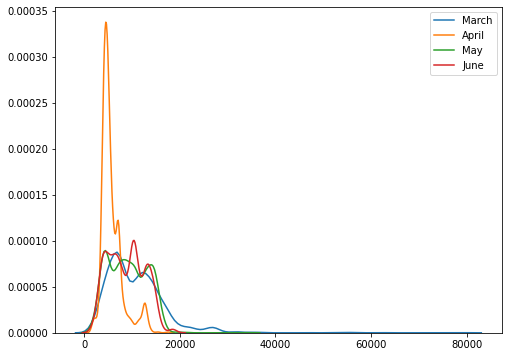

In [0]:
fig = plt.figure(figsize=(8,6))
fig.add_subplot(1,2,1)
sns.kdeplot(doj_march['Price'], label='March')
sns.kdeplot(doj_april['Price'], label='April')
sns.kdeplot(doj_may['Price'], label='May')
sns.kdeplot(doj_june['Price'], label='June')
fig.add_subplot(1,2,2)
sns.boxplot(doj_march)
plt.show()

In [0]:
import datetime

def change_to_date(str1):
  return datetime.datetime.strptime(str1, "%Y-%m-%d")

def change_month(dt):
  if ((dt >= change_to_date('2019-03-01')) & (dt <= change_to_date('2019-03-31'))):
    return 'March'
  elif ((dt >= change_to_date('2019-04-01')) & (dt <= change_to_date('2019-04-30'))):
    return 'April'
  elif ((dt >= change_to_date('2019-05-01')) & (dt <= change_to_date('2019-05-31'))):
    return 'May'
  elif ((dt >= change_to_date('2019-06-01')) & (dt <= change_to_date('2019-06-30'))):
    return 'June'
df_full['doj_month'] = df_full['doj_date'].apply(lambda x: change_month(x))

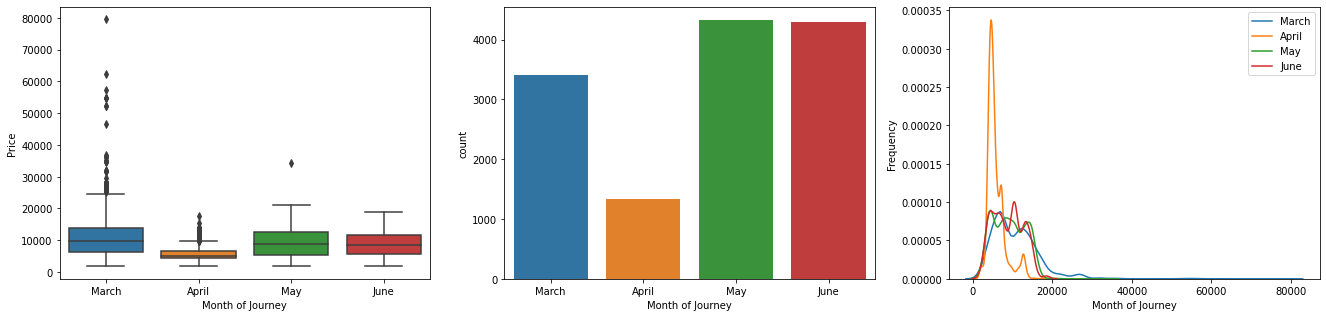

In [0]:
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='doj_month', y='Price', data=df_full, order=['March','April','May','June'])
ax1.set_xlabel('Month of Journey')
ax1.set_ylabel('Price')
ax2 = fig.add_subplot(1,3,2)
sns.countplot(df_full['doj_month'], order=['March','April','May','June'])
ax2.set_xlabel('Month of Journey')
ax2.set_ylabel('count')
ax3 = fig.add_subplot(1,3,3)
sns.kdeplot(df_full.loc[df_full['doj_month'] == 'March', 'Price'], label='March')
sns.kdeplot(df_full.loc[df_full['doj_month'] == 'April', 'Price'], label='April')
sns.kdeplot(df_full.loc[df_full['doj_month'] == 'May', 'Price'], label='May')
sns.kdeplot(df_full.loc[df_full['doj_month'] == 'June', 'Price'], label='June')
ax3.set_xlabel('Month of Journey')
ax3.set_ylabel('Frequency')
plt.show()

In [0]:
df_full['doj_day'] = df_full['doj_date'].dt.day_name()

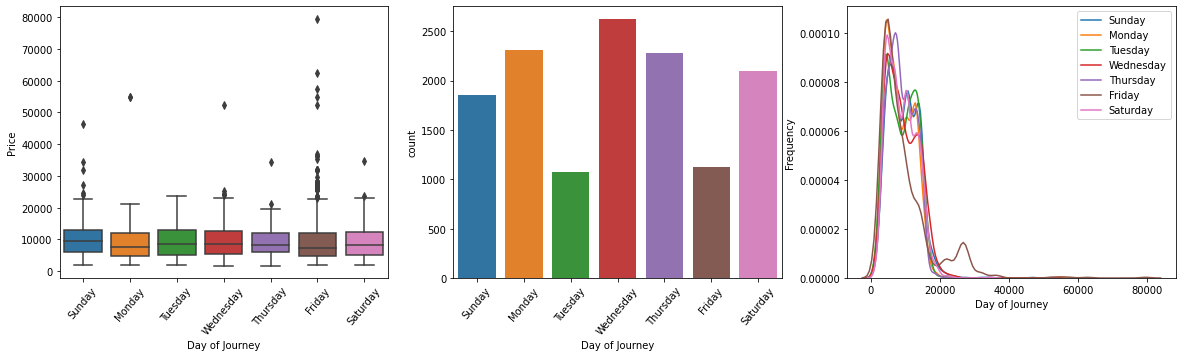

In [0]:
days_of_week = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
fig = plt.figure(figsize=(20,5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(x='doj_day', y='Price', data=df_full, order=days_of_week)
ax1.set_xlabel('Day of Journey')
ax1.set_ylabel('Price')
ax1.set_xticklabels(labels=days_of_week, rotation=50)
ax2 = fig.add_subplot(1,3,2)
sns.countplot(df_full['doj_day'], order=days_of_week)
ax2.set_xlabel('Day of Journey')
ax2.set_ylabel('count')
ax2.set_xticklabels(labels=days_of_week, rotation=50)
ax3 = fig.add_subplot(1,3,3)
for i in days_of_week:
  sns.kdeplot(df_full.loc[df_full['doj_day'] == i, 'Price'], label=i)
ax3.set_xlabel('Day of Journey')
ax3.set_ylabel('Frequency')
plt.show()

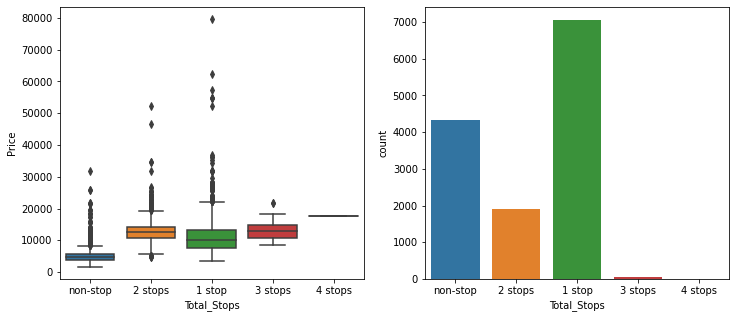

In [0]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
ax1 = fig.add_subplot(1,2,1)
sns.boxplot(x='Total_Stops', y='Price', data=df_full)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(df_full['Total_Stops'])
plt.show()

In [0]:
df_full.drop(index=df_full[df_full['Duration'] == '5m'].index, axis=0, inplace=True)

In [0]:
import re

def change_to_min(stime):
  h =  str(stime).split(':')[0].strip()
  m = 0
  if len(str(stime).split(':')) > 1:
    m = str(stime).split(':')[1].strip()
  return int(h)*60 + int(m)

def insert_min(stime):
  stimetemp = re.sub(r"^(\d+)h$", r"\1", stime)
  stimetemp = re.sub(r"^(\d+)h\s(\d+)m", r"\1:\2", stimetemp)
  return change_to_min(stimetemp)

df_full['duration_min'] = df_full['Duration'].apply(lambda x: insert_min(x))

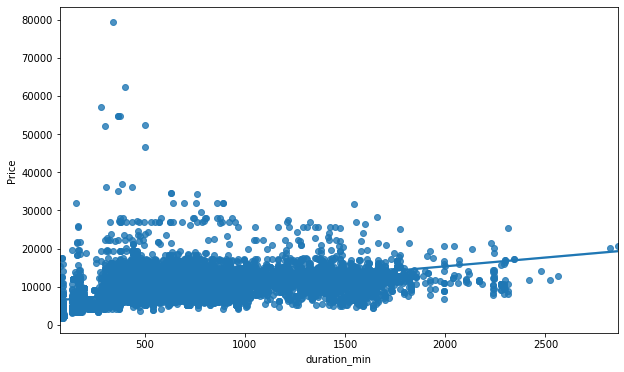

In [0]:
plt.figure(figsize=(10,6))
sns.regplot(x='duration_min', y='Price', data=df_full)
plt.title('Total travel duration(min) vs price')
plt.show()

In [0]:
df_full['departure_time'] = pd.to_datetime(df_full['Dep_Time'], errors='raise', format="%H:%M").dt.time

In [0]:
def format_arrival(stime):
  return re.sub(r"(\d+:\d+) \d+ \w+$", r"\1", stime)

df_full['arrival_formatted'] = df_full['Arrival_Time'].apply(lambda x: format_arrival(x))

In [0]:
df_full['arrival_time'] = pd.to_datetime(df_full['arrival_formatted'], errors='raise', format="%H:%M").dt.time

In [0]:
def getTimeInterval(colname, timeStart, timeEnd):
  return df_full.loc[(df_full[colname] >= timeStart) & (df_full[colname] <= timeEnd)]

df_ZerotoThreeAM = getTimeInterval('departure_time', datetime.time(0, 20), datetime.time(3,00))
df_ThreetoSixAM = getTimeInterval('departure_time', datetime.time(3, 1), datetime.time(6,00))
df_SixtoNineAM = getTimeInterval('departure_time', datetime.time(6, 1), datetime.time(9,00))
df_NinetoTwelveAM = getTimeInterval('departure_time', datetime.time(9, 1), datetime.time(12,00))
df_TwelvetoThreePM = getTimeInterval('departure_time', datetime.time(12, 1), datetime.time(15,00))
df_ThreetoSixPM = getTimeInterval('departure_time', datetime.time(15, 1), datetime.time(18,00))
df_SixtoNinePM = getTimeInterval('departure_time', datetime.time(18, 1), datetime.time(21,00))
df_NinetoTwelvePM = getTimeInterval('departure_time', datetime.time(21, 1), datetime.time(23,59))

df_aZerotoThreeAM = getTimeInterval('arrival_time', datetime.time(0, 20), datetime.time(3,00))
df_aThreetoSixAM = getTimeInterval('arrival_time', datetime.time(3, 1), datetime.time(6,00))
df_aSixtoNineAM = getTimeInterval('arrival_time', datetime.time(6, 1), datetime.time(9,00))
df_aNinetoTwelveAM = getTimeInterval('arrival_time', datetime.time(9, 1), datetime.time(12,00))
df_aTwelvetoThreePM = getTimeInterval('arrival_time', datetime.time(12, 1), datetime.time(15,00))
df_aThreetoSixPM = getTimeInterval('arrival_time', datetime.time(15, 1), datetime.time(18,00))
df_aSixtoNinePM = getTimeInterval('arrival_time', datetime.time(18, 1), datetime.time(21,00))
df_aNinetoTwelvePM = getTimeInterval('arrival_time', datetime.time(21, 1), datetime.time(23,59))

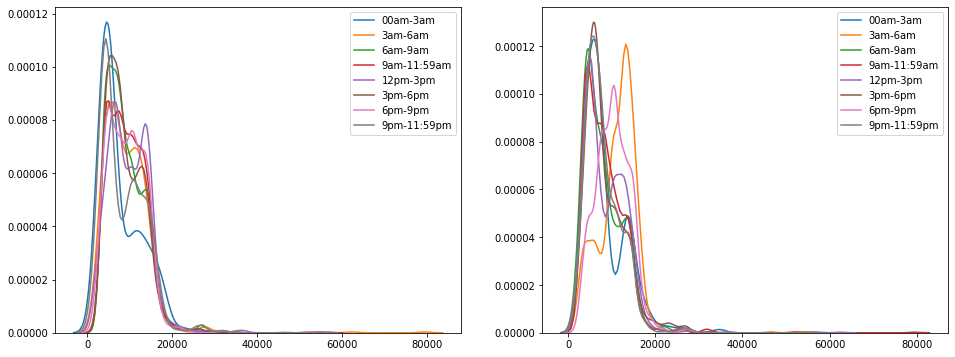

In [0]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.add_subplot(1,2,1)
sns.kdeplot(df_ZerotoThreeAM['Price'], label='00am-3am')
sns.kdeplot(df_ThreetoSixAM['Price'], label='3am-6am')
sns.kdeplot(df_SixtoNineAM['Price'], label='6am-9am')
sns.kdeplot(df_NinetoTwelveAM['Price'], label='9am-11:59am')
sns.kdeplot(df_TwelvetoThreePM['Price'], label='12pm-3pm')
sns.kdeplot(df_ThreetoSixPM['Price'], label='3pm-6pm')
sns.kdeplot(df_SixtoNinePM['Price'], label='6pm-9pm')
sns.kdeplot(df_NinetoTwelvePM['Price'], label='9pm-11:59pm')

fig.add_subplot(1,2,2)
sns.kdeplot(df_aZerotoThreeAM['Price'], label='00am-3am')
sns.kdeplot(df_aThreetoSixAM['Price'], label='3am-6am')
sns.kdeplot(df_aSixtoNineAM['Price'], label='6am-9am')
sns.kdeplot(df_aNinetoTwelveAM['Price'], label='9am-11:59am')
sns.kdeplot(df_aTwelvetoThreePM['Price'], label='12pm-3pm')
sns.kdeplot(df_aThreetoSixPM['Price'], label='3pm-6pm')
sns.kdeplot(df_aSixtoNinePM['Price'], label='6pm-9pm')
sns.kdeplot(df_aNinetoTwelvePM['Price'], label='9pm-11:59pm')
plt.show()

In [0]:
def changeTimeToCateg(colname, rvalue):
  if (rvalue >= datetime.time(0, 20)) & (rvalue <= datetime.time(3,00)):
    return colname + "_ZerotoThreeAM"
  elif (rvalue >= datetime.time(3, 1)) & (rvalue <= datetime.time(6,00)):
    return colname + "_ThreetoSixAM"
  elif (rvalue >= datetime.time(6, 1)) & (rvalue <= datetime.time(9,00)):
    return colname + "_SixtoNineAM"
  elif (rvalue >= datetime.time(9, 1)) & (rvalue <= datetime.time(12,00)):
    return colname + "_NinetoTwelveAM"
  if (rvalue >= datetime.time(12, 1)) & (rvalue <= datetime.time(15,00)):
    return colname + "_TwelvetoThreePM"
  elif (rvalue >= datetime.time(15, 1)) & (rvalue <= datetime.time(18,00)):
    return colname + "_ThreetoSixPM"
  elif (rvalue >= datetime.time(18, 1)) & (rvalue <= datetime.time(21,00)):
    return colname + "_SixtoNinePM"
  elif (rvalue >= datetime.time(21, 1)) & (rvalue <= datetime.time(23,59)):
    return colname + "_NinetoTwelvePM"

In [0]:
df_full['deptTime_categ'] = df_full['departure_time'].apply(lambda x: changeTimeToCateg('d', x))

In [0]:
df_full['arrivTime_categ'] = df_full['arrival_time'].apply(lambda x: changeTimeToCateg('a', x))

In [0]:
df_full.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'doj_date', 'doj_month', 'doj_day',
       'duration_min', 'departure_time', 'arrival_formatted', 'arrival_time',
       'deptTime_categ', 'arrivTime_categ'],
      dtype='object')

In [0]:
obj_cols = ['Airline', 'Total_Stops', 'doj_month', 'doj_day', 'deptTime_categ', 'arrivTime_categ']

In [0]:
df_source = pd.get_dummies(df_full['Source'], prefix='s')
df_destination = pd.get_dummies(df_full['Destination'], prefix='d')
df_obj_cols = pd.get_dummies(df_full[obj_cols], prefix="", prefix_sep="")

In [0]:
df_final = pd.concat([df_obj_cols,df_destination,df_source,df_full['duration_min'],df_full['Price']], axis=1)

In [0]:
df_final['duration_normin'] = (df_final['duration_min'] - df_final['duration_min'].mean())/df_final['duration_min'].std()

In [0]:
df_final.drop(columns=['duration_min'], axis=1, inplace=True)

In [0]:
df_train_final = df_final[:10681:]
df_test_final = df_final[10682::].reset_index(drop=True)
df_test_final.drop(columns=['Price'], axis=1, inplace=True)

In [0]:
print(df_train_final.shape)
print(df_test_final.shape)

(10681, 55)
(2669, 54)


In [0]:
df_train_X = df_train_final.drop(columns=['Price'], axis=1)
df_train_y = df_train_final['Price']

In [0]:
df_train_X.rename(columns={'1 stop':'one_stop', '2 stops':'two_stops', '3 stops':'three_stops', '4 stops':'four_stops'}, inplace=True)

In [0]:
result_df = pd.DataFrame({'Model':[], 'Details':[], 'r2(training)':[], 'adjusted_r2(training)':[], 
                          'root_mean_squared':[], 'r2(test)':[], 'adjusted_r2(test)':[], '5-fold cross_validation':[]})
def adjustedR2(r2,n,k):
  return r2-(k-1)/(n-k)*(1-r2)

In [0]:
features = ['duration_normin','April', 'June', 'March', 'May','Friday', 'Monday', 
            'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
            'd_NinetoTwelveAM', 'd_NinetoTwelvePM', 'd_SixtoNineAM',
            'd_SixtoNinePM', 'd_ThreetoSixAM', 'd_ThreetoSixPM','d_TwelvetoThreePM', 
            'd_ZerotoThreeAM', 'a_NinetoTwelveAM', 'a_NinetoTwelvePM', 'a_SixtoNineAM', 
            'a_SixtoNinePM', 'a_ThreetoSixAM', 'a_ThreetoSixPM', 'a_TwelvetoThreePM', 'a_ZerotoThreeAM', 
            'd_Banglore', 'd_Cochin', 'd_Delhi', 'd_Hyderabad', 'd_Kolkata', 's_Banglore', 
            's_Chennai', 's_Delhi', 's_Kolkata', 's_Mumbai','non-stop', 'Air Asia', 'Air India', 'GoAir', 
            'IndiGo', 'Jet Airways','Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 
            'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy']

In [0]:
lm = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df_train_X, df_train_y, test_size=0.20, random_state=3)
reg = lm.fit(X_train, y_train)
lr_all_ypred = reg.predict(X_test)

In [0]:
rsqtr = float(format(reg.score(X_train, y_train), '.3f'))
arsqtr = float(format(adjustedR2(reg.score(X_train, y_train), X_train.shape[0], len(X_train.columns)), '.3f'))
rmse = float(format(np.sqrt(mean_squared_error(y_test, lr_all_ypred)), '.3f'))
rsqte = float(format(reg.score(X_test, y_test), '.3f'))
arsqte = float(format(adjustedR2(reg.score(X_test, y_test), X_test.shape[0], len(X_train.columns)), '.3f'))
cvs = float(format(cross_val_score(lm, df_train_X, df_train_y, cv=5).mean(), '.3f'))

In [0]:
r=result_df.shape[0]
result_df.loc[r] = ['Multiple regression', '', rsqtr, arsqtr, rmse, rsqte, arsqte, cvs]
result_df

,Model,Details,r2(training),adjusted_r2(training),root_mean_squared,r2(test),adjusted_r2(test),5-fold cross_validation
0,Multiple regression,,0.632,0.63,2697.325,0.635,0.625,-1.615147e+22


In [0]:
lm2 = LinearRegression()
reg2 = lm2.fit(X_train[features], y_train)
lr_red_ypred_test = reg2.predict(X_test[features])
lr_red_ypred_train = reg2.predict(X_train[features])

In [0]:
rsqtr = float(format(reg2.score(X_train[features], y_train), '.3f'))
arsqtr = float(format(adjustedR2(reg2.score(X_train[features], y_train), X_train.shape[0], len(X_train[features].columns)), '.3f'))
rmse = float(format(np.sqrt(mean_squared_error(y_test, lr_red_ypred)), '.3f'))
rsqte = float(format(reg2.score(X_test[features], y_test), '.3f'))
arsqte = float(format(adjustedR2(reg2.score(X_test[features], y_test), X_test.shape[0], len(X_test[features].columns)), '.3f'))
cvs = float(format(cross_val_score(lm2, df_train_X[features], df_train_y, cv=5).mean(), '.3f'))

In [0]:
r=result_df.shape[0]
result_df.loc[r] = ['Multiple regression', 'removed stops', rsqtr, arsqtr, rmse, rsqte, arsqte, cvs]
result_df

,Model,Details,r2(training),adjusted_r2(training),root_mean_squared,r2(test),adjusted_r2(test),5-fold cross_validation
0,Multiple regression,,0.632,0.63,2697.325,0.635,0.625,-1.615147e+22
1,Multiple regression,removed stops,0.612,0.61,2754.235,0.619,0.610,6.090000e-01


In [0]:
dt = DecisionTreeRegressor(max_depth=3)
dreg = dt.fit(X_train, y_train)
y_dpredict = dreg.predict(X_test)

In [0]:
rsqtr = float(format(dreg.score(X_train, y_train), '.3f'))
arsqtr = float(format(adjustedR2(dreg.score(X_train, y_train), X_train.shape[0], len(X_train.columns)), '.3f'))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_dpredict)), '.3f'))
rsqte = float(format(dreg.score(X_test, y_test), '.3f'))
arsqte = float(format(adjustedR2(dreg.score(X_test, y_test), X_test.shape[0], len(X_train.columns)), '.3f'))
cvs = float(format(cross_val_score(dreg, df_train_X, df_train_y, cv=5).mean(), '.3f'))

In [0]:
r=result_df.shape[0]
result_df.loc[r] = ['Decision regression', '', rsqtr, arsqtr, rmse, rsqte, arsqte, cvs]
result_df

,Model,Details,r2(training),adjusted_r2(training),root_mean_squared,r2(test),adjusted_r2(test),5-fold cross_validation
0,Multiple regression,,0.632,0.630,2697.325,0.635,0.625,-1.615147e+22
1,Multiple regression,removed stops,0.612,0.610,2754.235,0.619,0.610,6.090000e-01
2,Decision regression,,0.551,0.549,3129.879,0.508,0.496,5.370000e-01


In [0]:
result_df.drop(index=3, axis=0, inplace=True)

In [0]:
dt2 = DecisionTreeRegressor(max_depth=3)
dreg2 = dt2.fit(X_train[features], y_train)
y_dpredict_red = dreg2.predict(X_test[features])

In [0]:
rsqtr = float(format(dreg2.score(X_train[features], y_train), '.3f'))
arsqtr = float(format(adjustedR2(dreg2.score(X_train[features], y_train), X_train.shape[0], len(X_train[features].columns)), '.3f'))
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_dpredict_red)), '.3f'))
rsqte = float(format(dreg2.score(X_test[features], y_test), '.3f'))
arsqte = float(format(adjustedR2(dreg2.score(X_test[features], y_test), X_test.shape[0], len(X_test[features].columns)), '.3f'))
cvs = float(format(cross_val_score(dreg2, df_train_final[features], df_train_final['Price'], cv=5).mean(), '.3f'))

In [0]:
r=result_df.shape[0]
result_df.loc[r] = ['Decision regression', 'removed stops', rsqtr, arsqtr, rmse, rsqte, arsqte, cvs]
result_df

,Model,Details,r2(training),adjusted_r2(training),root_mean_squared,r2(test),adjusted_r2(test),5-fold cross_validation
0,Multiple regression,,0.632,0.630,2697.325,0.635,0.625,-1.615147e+22
1,Multiple regression,removed stops,0.612,0.610,2754.235,0.619,0.610,6.090000e-01
2,Decision regression,,0.551,0.549,3129.879,0.508,0.496,5.370000e-01
3,Decision regression,removed stops,0.551,0.549,3129.879,0.508,0.496,5.370000e-01


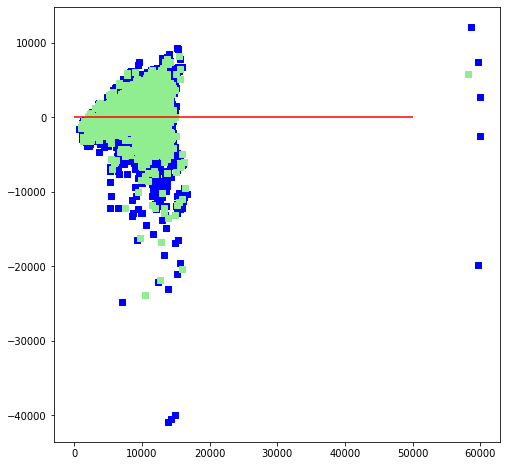

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(lr_red_ypred_train, lr_red_ypred_train - y_train, c='blue', marker='s', label='Training data')
plt.scatter(lr_red_ypred_test, lr_red_ypred_test-y_test, c='lightgreen', marker='s', label='Test data')
plt.hlines(y=0, xmin=0, xmax=50000, color='red')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

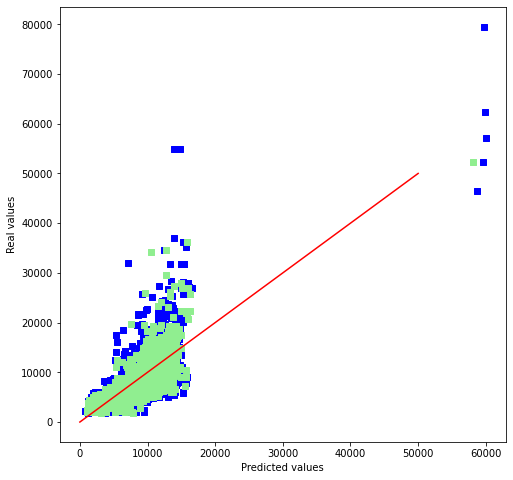

In [0]:
plt.figure(figsize=(8,8))
plt.scatter(lr_red_ypred_train, y_train, c='blue', marker='s', label='Training data')
plt.scatter(lr_red_ypred_test, y_test, c='lightgreen', marker='s', label='Test data')
plt.plot([0,50000], [0,50000], c='red')
plt.xlabel('Predicted values')
plt.ylabel('Real values')
plt.show()

In [0]:
final_prediction = reg2.predict(df_test_final[features])
final_prediction

array([ 7495.578125, 12421.390625, 10597.578125, ..., 13876.390625,
       11797.640625, 10874.078125])

In [0]:
output_path = os.path.join(root_path, 'vignesh.csv')
pd.DataFrame(final_prediction, columns=['Price']).to_csv(output_path)